## Location: lat + long

In [175]:
import pandas as pd
import numpy as np

# For geocoding
from geopy.geocoders import Nominatim

# For plotting
import plotly.express as px

In [176]:
df = pd.read_csv('data/preprocessed_data.csv')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  8280 non-null   int64  
 1   Description          8280 non-null   object 
 2   Price                8280 non-null   int64  
 3   Deposit              8280 non-null   int64  
 4   Type                 8280 non-null   object 
 5   Built square meters  8280 non-null   int64  
 6   Plot square meters   8280 non-null   float64
 7   Rooms                8280 non-null   int64  
 8   Bathrooms            8280 non-null   int64  
 9   Storage room         8280 non-null   bool   
 10  Wardrobe             8280 non-null   bool   
 11  Furnished            8280 non-null   bool   
 12  Equipped kitchen     8280 non-null   bool   
 13  Renovation           8280 non-null   bool   
 14  Reduced mobility     8280 non-null   bool   
 15  Heating              8280 non-null   b

In [178]:
df.head(1)

,_id,Description,Price,Deposit,Type,Built square meters,Plot square meters,Rooms,Bathrooms,Storage room,...,Heating,Garage,Floor,Elevator,Air conditioning,Swimming pool,Garden,Green areas,Terrace,Location
0,103202201,alquiler de piso en avenida de ramón y cajal. ...,575,0,piso,50,0.0,1,1,False,...,False,False,planta 1ª exterior,True,False,False,False,False,False,"Cercedilla, Zona noroeste, Madrid"


### 1. Latittude and Longitude

In [179]:
def get_latitude_longitude(address):
    geolocator = Nominatim(user_agent="RentMate")
    location = geolocator.geocode(address)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None, None

In [180]:
# For location in df['location'], execute get_latitude_longitude(location)
# and store the results in new columns: lat and lon
# df['lat'], df['lon'] = zip(*df['Location'].apply(get_latitude_longitude))

In [181]:
# Initi Lattitude and Longitude columns
df['Latitude'] = np.nan
df['Longitude'] = np.nan

Get the location (lat, long) for each address, changing all the data with same address simultaneously.

In [182]:
for location in df["Location"]:
    # If the column has a value for Latitude and Longitude, skip it
    if (
        df.loc[df["Location"] == location, "Latitude"].notnull().all()
        and df.loc[df["Location"] == location, "Longitude"].notnull().all()
    ):
        continue

    try:
        # Split each element in the Series
        locs = location.split(", ")

        stop_words = ["Zona", "Distrito", "capital", "Urb.", "Corredor", "Valdebernardo"]

        location_str = (
            " ".join(
                map(
                    #  x.replace('Barrio' and 'Madrid' and ":", "")
                    lambda x: x.replace("Barrio", "")
                    .replace("Madrid", "")
                    .replace(":", "")
                    if all(word not in x for word in stop_words)
                    else "",
                    locs,
                )
            ).strip()
            + ", Comunidad de Madrid"
        )

        # Add Comunidad de Madrid to the end of the string to specify the region ( Aranjuez - went to Colombia, etc.)

        # Insert the results into the df DataFrame (lat and lon columns)
        lat, lon = get_latitude_longitude(location_str)

        # Update Latitude and Longitude columns for all rows with the same location
        print(f"Location: {location_str} -> Latitude: {lat}, Longitude: {lon}")
        df.loc[df["Location"] == location, "Latitude"] = lat
        df.loc[df["Location"] == location, "Longitude"] = lon

    except:
        print(f"Error with {location}")
        continue

Location: Cercedilla, Comunidad de Madrid -> Latitude: 40.7412931, Longitude: -4.0558002


Location: Horcajo de la Sierra, Comunidad de Madrid -> Latitude: 41.0681757, Longitude: -3.5854706
Location: Valdilecha, Comunidad de Madrid -> Latitude: 40.2926854, Longitude: -3.3002096
Location: Miraflores de la Sierra, Comunidad de Madrid -> Latitude: 40.8137532, Longitude: -3.7667236
Location: Rascafría, Comunidad de Madrid -> Latitude: 40.9038871, Longitude: -3.8802853
Location: Villarejo de Salvanés, Comunidad de Madrid -> Latitude: 40.1683582, Longitude: -3.2738764
Location: Serracines, Comunidad de Madrid -> Latitude: 40.6221542, Longitude: -3.4004171
Location: Becerril de la Sierra, Comunidad de Madrid -> Latitude: 40.7163374, Longitude: -3.9890681
Location: Aranjuez, Comunidad de Madrid -> Latitude: 40.03221, Longitude: -3.6039604
Location: Villaviciosa de Odón, Comunidad de Madrid -> Latitude: 40.3573787, Longitude: -3.9002334
Location: Aranjuez, Comunidad de Madrid -> Latitude: 40.03221, Longitude: -3.6039604
Location: Alpedrete, Comunidad de Madrid -> Latitude: 40.6599005

In [ ]:
# # Shoiw column with Location contains Barrio Las Cañadilla
# location = "Barrio La Cañadilla, Distrito Rozas Centro, Las Rozas de Madrid, Zona noroeste, Madrid:"
# # Split each element in the Series
# locs = location.split(", ")

# stop_words = [
#     "Zona",
#     "Distrito",
#     "capital",
#     "Urb.",
#     "Corredor",
#     "Valdebernardo",
# ]

# location_str = (
#     " ".join(
#         map(
#             #  x.replace('Barrio' and 'Madrid' and ":", "")
#             lambda x: x.replace('Barrio', "").replace('Madrid', "").replace(":", "")
#             if all(word not in x for word in stop_words)
#             else "",
#             locs,
#         )
#     ).strip()
#     + ", Comunidad de Madrid"
# )

# # Add Comunidad de Madrid to the end of the string to specify the region ( Aranjuez - went to Colombia, etc.)

# # Insert the results into the df DataFrame (lat and lon columns)
# lat, lon = get_latitude_longitude(location_str)

# # Update Latitude and Longitude columns for all rows with the same location
# print(f"Location: {location_str} -> Latitude: {lat}, Longitude: {lon}")

Location: La Cañadilla  Las Rozas de, Comunidad de Madrid -> Latitude: 40.4894674, Longitude: -3.8707377


### 2. Data visualization

In [184]:
# Count the number of rows with NaN values in the Latitude and Longitude columns
print(df['Latitude'].isnull().sum(), df['Longitude'].isnull().sum())

59 59


In [185]:
df.head(10)

,_id,Description,Price,Deposit,Type,Built square meters,Plot square meters,Rooms,Bathrooms,Storage room,...,Floor,Elevator,Air conditioning,Swimming pool,Garden,Green areas,Terrace,Location,Latitude,Longitude
0,103202201,alquiler de piso en avenida de ramón y cajal. ...,575,0,piso,50,0.0,1,1,False,...,planta 1ª exterior,True,False,False,False,False,False,"Cercedilla, Zona noroeste, Madrid",40.741293,-4.055800
1,103011142,alquiler de piso en horcajo de la sierra. se a...,575,0,piso,89,0.0,3,2,False,...,planta 1ª exterior,True,False,False,False,False,False,"Horcajo de la Sierra, Zona norte, Madrid",41.068176,-3.585471
2,103106869,alquiler de ático en pinar. inmovelilla. alqui...,580,1,ático,60,0.0,1,1,False,...,planta 2ª exterior,True,False,False,False,False,False,"Valdilecha, Zona sureste, Madrid",40.292685,-3.300210
3,29483288,"alquiler de estudio en travesía concejo, 28. e...",580,1,estudio,35,0.0,0,1,False,...,planta 2ª exterior,True,False,False,False,False,False,"Miraflores de la Sierra, Zona norte, Madrid",40.813753,-3.766724
4,103304178,alquiler de piso en calle de la cerquilla. mag...,590,0,piso,110,0.0,3,2,False,...,planta 1ª exterior,True,False,False,False,False,False,"Rascafría, Zona norte, Madrid",40.903887,-3.880285
5,103222093,alquiler de piso en sancho panza. kdkasa gesti...,590,1,piso,47,0.0,1,1,False,...,planta 2ª exterior,True,False,False,False,False,False,"Villarejo de Salvanés, Zona sureste, Madrid",40.168358,-3.273876
6,103160449,alquiler de estudio en serracines. daganzo inm...,590,2,estudio,35,0.0,0,1,False,...,bajo exterior,True,False,False,False,True,False,"Serracines, Zona norte, Madrid",40.622154,-3.400417
7,103297471,alquiler de casa o chalet independiente en ave...,600,1,chalet independiente,40,0.0,1,1,False,...,no aplica,False,False,False,False,False,False,"Becerril de la Sierra, Zona noroeste, Madrid",40.716337,-3.989068
8,102998015,alquiler de piso en calle norte. vivienda de d...,600,1,piso,40,0.0,2,1,False,...,bajo exterior,True,False,False,False,False,False,"Miraflores de la Sierra, Zona norte, Madrid",40.813753,-3.766724
9,103288427,"alquiler de piso en almíbar, 8. piso de dormit...",600,1,piso,56,0.0,2,1,False,...,bajo interior,True,False,False,False,False,False,"Distrito Centro, Aranjuez, Zona sureste, Madrid",40.032210,-3.603960


#### 2.1. Data distribution

##### 2.1.1. Histogram - Latitude
As it can be seen, the values for latitude are in between 40 and 41 which are the ranges of the Community of Madrid.

<Axes: >

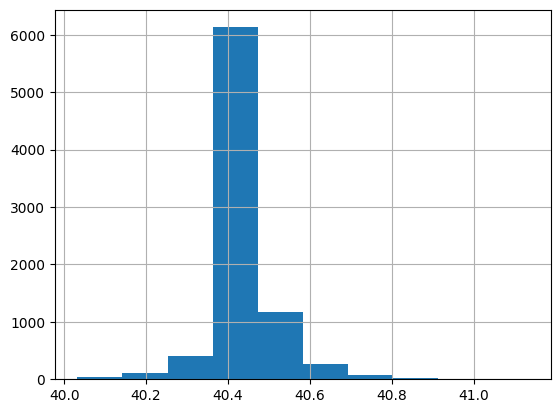

In [186]:
# Plot distribution of Latitude
df['Latitude'].hist()

##### 2.1.2. Histogram - Longitude
As it can be seen, the values for longitude are in between -4 and -3 which are the ranges of the Community of Madrid.

<Axes: >

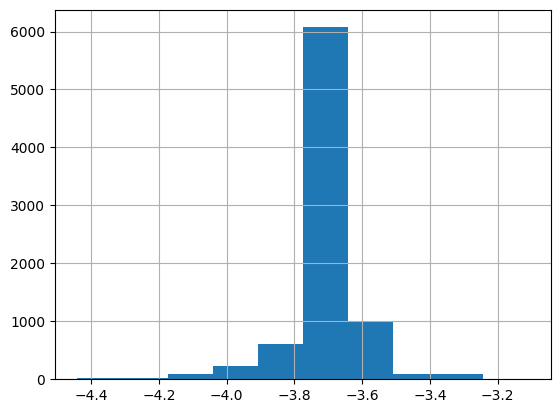

In [187]:
# Plot distribution of Latitude
df['Longitude'].hist()

##### 2.1.3. Scatter plot - Latitude and Longitude
As it can be seen, the values for latitude and longitude are in between 40 and 41 and -4 and -3 respectively which are the ranges of the Community of Madrid.

It is noticeable that the scatter plot has the shape of the Community of Madrid.

<Axes: xlabel='Longitude', ylabel='Latitude'>

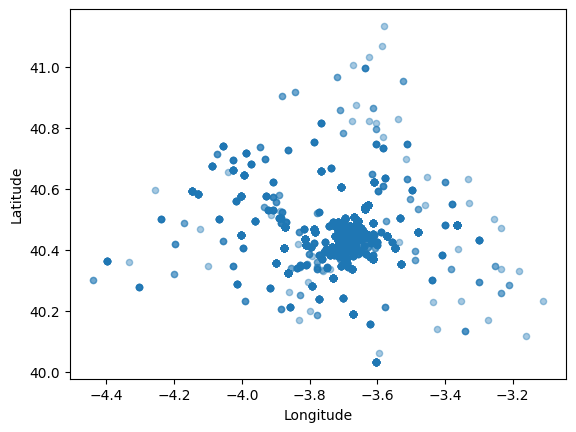

In [188]:
# Plot latitude and longitude on a scatter plot
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)

### 2.2. Map Heatmap

#### 2.2.1. Basic Lat and Long Heatmap

In [189]:
fig = px.density_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    radius=8,
    zoom=6,
    center=dict(lat=40.4168, lon=-3.7038),  # Comunidad de Madrid coordinates
    color_continuous_scale="Viridis",
    mapbox_style="open-street-map",
    # On hover show location and price
    hover_data=["Location", "Price"],
)

fig.update_layout(margin={"t": 0, "r": 0, "l": 0, "b": 0})

fig.show()

#### 2.2.2. Heatmap with price as weight

In [183]:
# Heatmap showing price distribution by location
fig = px.density_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    z="Price",
    radius=8,
    zoom=6,
    center=dict(lat=40.4168, lon=-3.7038),  # Comunidad de Madrid coordinates
    color_continuous_scale="Viridis",
    mapbox_style="open-street-map",
    hover_data=["Location", "Price"],
)

fig.update_layout(margin={"t": 0, "r": 0, "l": 0, "b": 0})

fig.show()

## 3. Export CSV

In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('data/lat_long_preprocessed_data.csv', index=False)